In [145]:
import torch
torch.manual_seed(55)

Understanding the purpose of random_seed()

In [146]:
# Set the seed
torch.manual_seed(55)  # sets the random seed for pytorch random generator to 55. The seq of random no generated will be the same

# Generate random numbers
random_tensor1 = torch.randn(3)
print(random_tensor1)

# Set the seed again
torch.manual_seed(55) # again setting the seed

# Generate random numbers again
random_tensor2 = torch.randn(3)
print(random_tensor2)

# The two tensors will be the same
assert torch.equal(random_tensor1, random_tensor2), "The tensors are not equal"

print(torch.randn(3)) # by not setting seed we see the random no changes


tensor([-0.9655, -2.2611,  1.4339])
tensor([-0.9655, -2.2611,  1.4339])
tensor([-0.5137, -0.0938, -1.7767])


# Let's Start

In [147]:
import torch.nn as nn
import torch.nn.functional as F

Creating the Model class that inherits module

In [148]:
class Model(nn.Module):
  #input layer-> 4 features of flowers
  # hidden layer1 which gets inputs and generate output to next hidden layer2
  # hidden layer 2 gets input from the hidden layer1 and generates output to the output layer
  # output layer (3 classes of iris flower)obtains the inputs and generate the final output
  def __init__(self,input_feat=4,hidden1=8,hidden2=9,output_feat=3):
    super(Model,self).__init__()
    #__init__ constructor is used to initialize the parameters for network,executed when obj of class is created
    #In PyTorch, this method is used to define the layers of the network, such as convolutional layers, linear layers, activation functions, etc.
    self.fc1=nn.Linear(input_feat,hidden1)
    self.fc2=nn.Linear(hidden1,hidden2)
    self.output=nn.Linear(hidden2,output_feat)

  def forward(self,x): # this methods define the forward pass of the neural network
  # This method takes the input data and passes it through the layers of network to produce the output (PASSES IN FORWARD DIRECTION)
  # This method is executed whenever the model is called to make a prediction or to compute the loss during training.
    x=F.relu(self.fc1(x)) # Why using relu? rectified linear unit is an activation function used in NN
    x=F.relu(self.fc2(x))
    x=F.relu(self.output(x))
    return x


# __init__ sets up the network’s structure by defining the layers, while forward specifies how the data flows through the network.
# Both methods are required to create a neural network in PyTorch and serve different purposes.

Learn more about Relu-

The ReLU function is defined as:
ReLU
(
𝑥
)
=
max(0,x)

ReLU(x)=max(0,x)
This means:
If the input
𝑥
x is greater than 0, ReLU returns
𝑥
x.
If the input
𝑥
x is less than or equal to 0, ReLU returns 0.


Why Use ReLU?
Introduce Non-linearity:

Neural networks can model complex patterns in the data.
Without activation functions like ReLU, the network would only be able to learn linear relationships, no matter how many layers it has.
Avoid Vanishing Gradient Problem:

Unlike other activation functions like sigmoid or tanh, ReLU does not suffer from the vanishing gradient problem. This means gradients do not become extremely small as they pass through the layers, making training more efficient.

The ReLU activation function is applied after each linear layer to introduce non-linearity, enabling the network to learn complex patterns.

In [149]:
torch.manual_seed(41)
model=Model()

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
url="https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
df=pd.read_csv(url)

In [152]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [153]:
df["variety"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [154]:
# converting into float from strings
df["variety"]=df["variety"].replace("Setosa",0.0)
df["variety"]=df["variety"].replace("Versicolor",1.0)
df["variety"]=df["variety"].replace("Virginica",2.0)

In [155]:
df.variety.unique()

array([0., 1., 2.])

In [156]:
X=df.drop(columns="variety",axis=1)
y=df.variety
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [157]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: variety, dtype: float64

In [158]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

# Converting X to Float Tensor and y to long tensor

In [159]:
# If X_train is a DataFrame, convert it to a NumPy array first
X_train = X_train.values  # or use X_train.to_numpy()
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

In [160]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

This criterion computes the cross entropy loss between input logits and target.

In [161]:
# loss function - CrossEntropy - useful for multiclass classification problem
criterion=nn.CrossEntropyLoss()

# Choosing optimizer
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [162]:
for param in model.parameters():
    print(param)


Parameter containing:
tensor([[-0.2636, -0.2734,  0.3005, -0.3308],
        [-0.2350,  0.2720, -0.3718,  0.2452],
        [ 0.3045,  0.1357,  0.0896,  0.1933],
        [ 0.3782,  0.0407, -0.3600,  0.4613],
        [ 0.3666, -0.0116, -0.2923, -0.1937],
        [-0.4415,  0.3314, -0.0434,  0.3445],
        [ 0.1883, -0.0992, -0.3197,  0.1740],
        [-0.3208, -0.1111,  0.2972, -0.2723]], requires_grad=True)
Parameter containing:
tensor([-0.0245, -0.0679,  0.0573,  0.4814,  0.2923, -0.1877,  0.4425, -0.1626],
       requires_grad=True)
Parameter containing:
tensor([[ 0.1456,  0.1463, -0.0107, -0.3290,  0.3324, -0.0817,  0.2408, -0.2121],
        [-0.0361,  0.3031, -0.3068,  0.0136, -0.0046, -0.3022, -0.0685, -0.3241],
        [ 0.0764,  0.0595,  0.2023,  0.0088, -0.1424, -0.1275, -0.1320,  0.2750],
        [ 0.1133, -0.3520,  0.0632, -0.0472,  0.2579, -0.1034,  0.3086,  0.1093],
        [-0.3185,  0.0744, -0.0807,  0.1770, -0.3035, -0.0259,  0.2337,  0.1253],
        [ 0.1664,  0.2993, 

In [163]:
print(model)

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (output): Linear(in_features=9, out_features=3, bias=True)
)


Training the model!

Epoch => one run through the training data in our network


In [164]:
epochs=100
losses=[]
for i in range(epochs):
  # go forward and get the prediction
  y_pred=model.forward(X_train)
  # measure the loss/error
  loss=criterion(y_pred,y_train)
  #keep track of the losses
  losses.append(loss.detach().numpy())  # losses are tensor so obtaining it in the numpy arr form
  # print after evry 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i}, Loss: {loss}')
  # Do some BACK PROPOGATION , take the error rate of forward propogation and feed it back thru the network to fine tune the weight
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0, Loss: 1.125203251838684
Epoch: 10, Loss: 1.0097211599349976
Epoch: 20, Loss: 0.8516881465911865
Epoch: 30, Loss: 0.6555687189102173
Epoch: 40, Loss: 0.45029518008232117
Epoch: 50, Loss: 0.2718472480773926
Epoch: 60, Loss: 0.1553877890110016
Epoch: 70, Loss: 0.09336269646883011
Epoch: 80, Loss: 0.06463461369276047
Epoch: 90, Loss: 0.05066271126270294


Text(0, 0.5, 'Loss/Error')

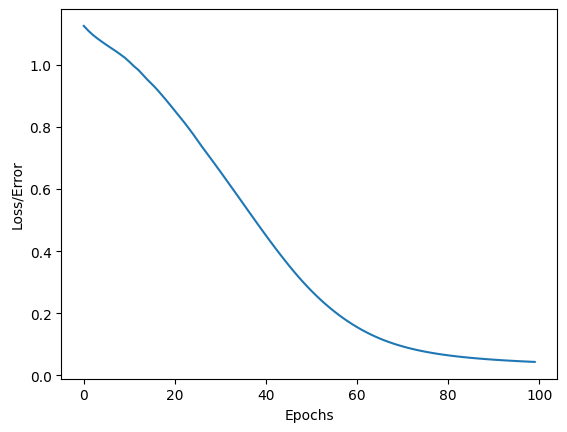

In [165]:
plt.plot(range(epochs),losses)
plt.xlabel("Epochs")
plt.ylabel("Loss/Error")

Evaluate the model on test data

In [166]:
with torch.no_grad(): # basically turn off the back propogation
 y_eval=model.forward(X_test)
 loss=criterion(y_eval,y_test) #find the loss or error
loss


tensor(0.1295)

In [167]:
correct=0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val=model.forward(data)
    if y_test[i]==0:
      x="Setosa"
    elif y_test[i]==1:
      x="Veriscolor"
    else:
      x="Verginica"
    #will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()} \t {x}')
    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct+=1

print(f'We got {correct} correct!')

1.) tensor([0.0000, 7.4447, 9.9152]) 	 2 	 2 	 Verginica
2.) tensor([ 0.0000,  7.7042, 14.3743]) 	 2 	 2 	 Verginica
3.) tensor([ 0.0000,  9.1280, 15.1753]) 	 2 	 2 	 Verginica
4.) tensor([0.2102, 8.3280, 4.5364]) 	 1 	 1 	 Veriscolor
5.) tensor([ 0.0000,  8.4035, 12.4779]) 	 2 	 2 	 Verginica
6.) tensor([1.6255, 8.0527, 1.9799]) 	 1 	 1 	 Veriscolor
7.) tensor([0.0000, 8.0659, 9.2757]) 	 2 	 2 	 Verginica
8.) tensor([0.3294, 8.4105, 4.3070]) 	 1 	 1 	 Veriscolor
9.) tensor([ 0.0000,  8.2367, 10.8423]) 	 2 	 2 	 Verginica
10.) tensor([ 0.0000,  8.1941, 15.2505]) 	 2 	 2 	 Verginica
11.) tensor([0.0000, 7.9806, 8.7350]) 	 2 	 2 	 Verginica
12.) tensor([8.9715, 3.4637, 0.0000]) 	 0 	 0 	 Setosa
13.) tensor([8.0554, 3.1741, 0.0000]) 	 0 	 0 	 Setosa
14.) tensor([2.2377, 6.4805, 0.4353]) 	 1 	 1 	 Veriscolor
15.) tensor([8.0202, 3.9148, 0.0000]) 	 0 	 0 	 Setosa
16.) tensor([0.0000, 8.1254, 8.0101]) 	 2 	 1 	 Verginica
17.) tensor([8.3626, 3.3009, 0.0000]) 	 0 	 0 	 Setosa
18.) tensor([0.0

Evaluating New data on network

In [174]:
new_iris=torch.tensor([4.7,3.2,1.3,0.2])

In [175]:
with torch.no_grad():
  print(model(new_iris))

tensor([8.5194, 3.3207, 0.0000])


In [176]:
new_iris=torch.tensor([5.9,3.0,5.1,1.8])

In [177]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 0.0000,  7.5979, 10.1487])


In [178]:
# Save our NN model
torch.save(model.state_dict(),"iris_model.pt")


In [179]:
# load the saved model
new_model=Model()
new_model.load_state_dict(torch.load("iris_model.pt"))

<All keys matched successfully>

In [180]:
# making sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (output): Linear(in_features=9, out_features=3, bias=True)
)